WaterShed Algorithm

In [13]:
import cv2
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

In [14]:
road = cv2.imread('Images/road_image.jpg')
road_copy = np.copy(road)

In [15]:
road_copy.shape

(600, 800, 3)

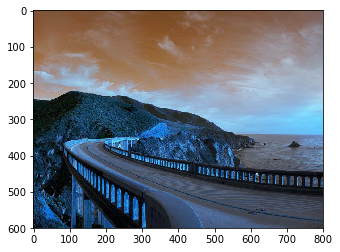

In [16]:
plt.imshow(road)

In [17]:
marker_image = np.zeros(road.shape[:2],dtype=np.int32)

In [18]:
segments = np.zeros(road.shape,dtype=np.uint8)

In [19]:
def create_rgb(i):
    x = np.array(cm.tab10(i))[:3]*255
    return tuple(x)

In [20]:
colors = []

In [21]:
# One color for each single digit
for i in range(10):
    colors.append(create_rgb(i))

In [22]:
# Numbers 0-9
n_markers = 10

In [23]:
# Default settings
current_marker = 1
marks_updated = False

In [24]:
def mouse_callback(event, x, y, flags, param):
    global marks_updated 

    if event == cv2.EVENT_LBUTTONDOWN:
        
        # TRACKING FOR MARKERS
        cv2.circle(marker_image, (x, y), 10, (current_marker), -1)
        
        # DISPLAY ON USER IMAGE
        cv2.circle(road_copy, (x, y), 10, colors[current_marker], -1)
        marks_updated = True


In [30]:
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)

while True:
    
    # SHow the 2 windows
    cv2.resizeWindow('WaterShed Segments', 700, 600)
    cv2.imshow('WaterShed Segments', segments)
    cv2.resizeWindow('Road Image', 700, 600)
    cv2.imshow('Road Image', road_copy)
        
        
    # Close everything if Esc is pressed
    k = cv2.waitKey(1)

    if k == 27:
        break
        
    # Clear all colors and start over if 'c' is pressed
    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[0:2], dtype=np.int32)
        segments = np.zeros(road.shape,dtype=np.uint8)
        
    # If a number 0-9 is chosen index the color
    elif k > 0 and chr(k).isdigit():
        # chr converts to printable digit
        
        current_marker  = int(chr(k))
        
        # CODE TO CHECK INCASE USER IS CARELESS
#         n = int(chr(k))
#         if 1 <= n <= n_markers:
#             current_marker = n
    
    # If we clicked somewhere, call the watershed algorithm on our chosen markers
    if marks_updated:
        
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)
        
        segments = np.zeros(road.shape,dtype=np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy == (color_ind)] = colors[color_ind]
        marks_updated = False
        
cv2.destroyAllWindows()